In [1]:
import os
import random
import hashlib
import numpy as np
import matplotlib.pyplot as plt
from preprocessor import get_training_data

In [2]:
directory = "caltech-101/101_ObjectCategories"
class_names = sorted([d for d in os.listdir(directory) if d != '.DS_Store'])
print('There are', len(class_names), 'classes')
print('First 5 classes:')
print(class_names[:5])

There are 101 classes
First 5 classes:
['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion']


total number of images:  8677


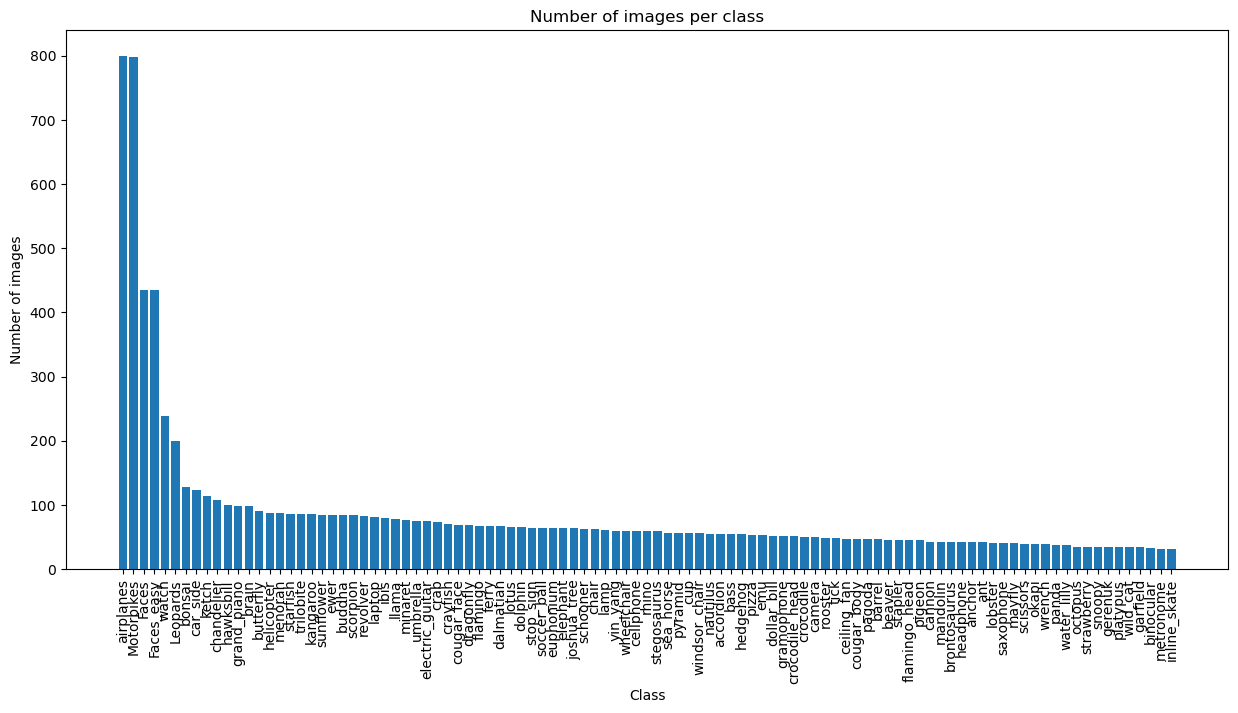

In [3]:
num_images = [len(os.listdir(os.path.join(directory, class_name))) for class_name in class_names]
sorted_indices = np.argsort(num_images)[::-1]
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_num_images = [num_images[i] for i in sorted_indices]

print("total number of images: ", sum(sorted_num_images))

plt.figure(figsize=(15, 7))
plt.bar(np.arange(len(sorted_class_names)), sorted_num_images)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.xticks(np.arange(len(sorted_class_names)), sorted_class_names, rotation=90)
plt.show()

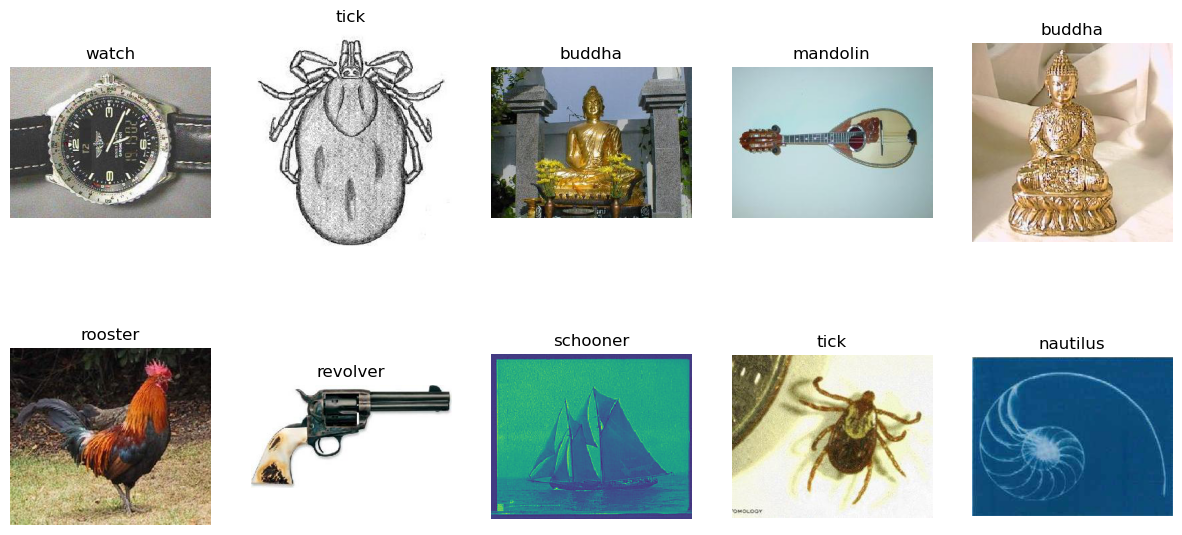

In [4]:
# show 10 random images from the dataset
plt.figure(figsize=(15, 7))
for i in range(10):
    class_name = np.random.choice(class_names)
    image_name = np.random.choice(os.listdir(os.path.join(directory, class_name)))
    image = plt.imread(os.path.join(directory, class_name, image_name))
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_name)

In [5]:
print('Mean number of images per class:', np.mean(num_images))
print('Min number of images per class:', np.min(num_images))
print('Max number of images per class:', np.max(num_images))

Mean number of images per class: 85.91089108910892
Min number of images per class: 31
Max number of images per class: 800


In [6]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
    
hashes = {}
duplicates = []

for class_name in class_names:
    image_files = os.listdir(os.path.join(directory, class_name))
    for image_file in image_files:
        image_path = os.path.join(directory, class_name, image_file)
        h = file_hash(image_path)
        if h in hashes:
            duplicates.append((image_path, hashes[h]))
        else:
            hashes[h] = image_path
            
print('Number of duplicate images:', len(duplicates))

Number of duplicate images: 0


# Image loading and augmentation for the models

In [7]:
img_height = 128
img_width = 128

exclude_classes = {
    "airplanes",
    "Motorbikes",
    "Faces",
    "Faces_easy",
    "watch",
    "Leopards",
}

x_train, x_test, y_train, y_test, class_names_with_excluded = get_training_data(
    # using cnn version here to keep height and width dimensions to show as images
    "cnn",
    directory,
    img_height,
    img_width,
    exclude_classes,
)

Balancing class accordion
Balancing class anchor
Balancing class ant
Balancing class barrel
Balancing class bass
Balancing class beaver
Balancing class binocular
Balancing class bonsai
Balancing class brain
Balancing class brontosaurus
Balancing class buddha
Balancing class butterfly
Balancing class camera
Balancing class cannon
Balancing class car_side
Balancing class ceiling_fan
Balancing class cellphone
Balancing class chair
Balancing class chandelier
Balancing class cougar_body
Balancing class cougar_face
Balancing class crab
Balancing class crayfish
Balancing class crocodile
Balancing class crocodile_head
Balancing class cup
Balancing class dalmatian
Balancing class dollar_bill
Balancing class dolphin
Balancing class dragonfly
Balancing class electric_guitar
Balancing class elephant
Balancing class emu
Balancing class euphonium
Balancing class ewer
Balancing class ferry
Balancing class flamingo
Balancing class flamingo_head
Balancing class garfield
Balancing class gerenuk
Balancin

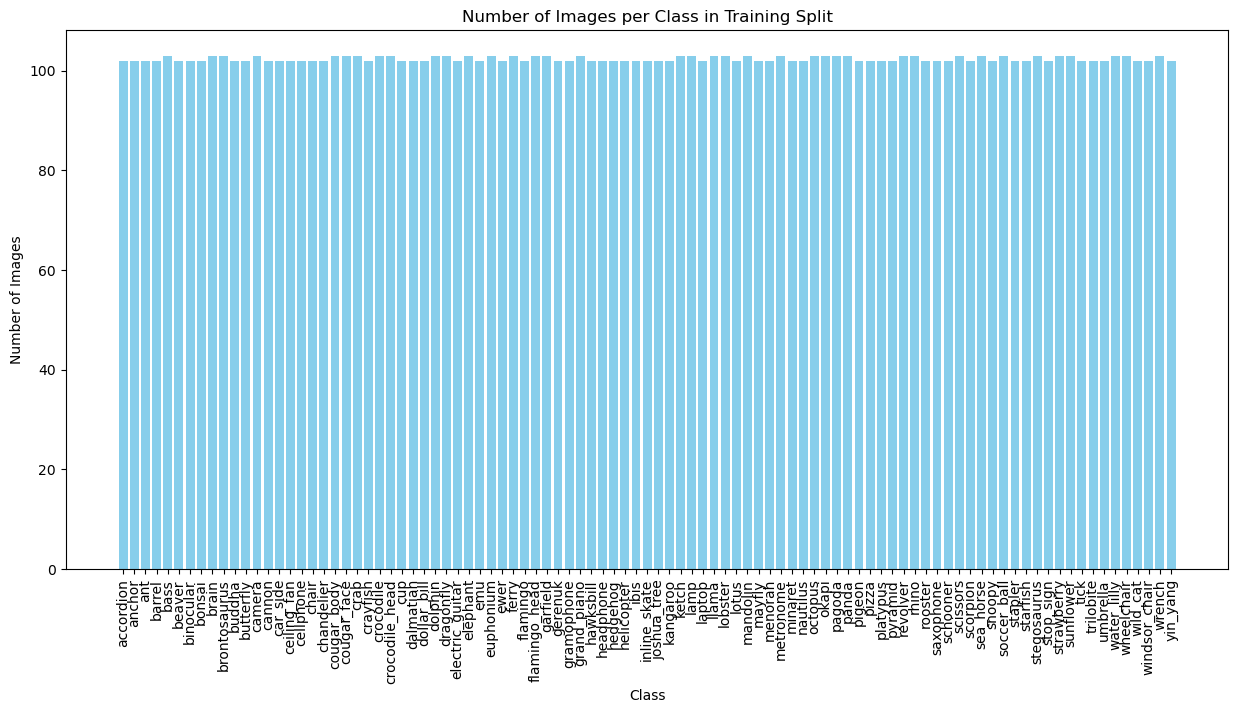

In [8]:
# show number of images per class in the training split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names_with_excluded, np.bincount(y_train), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Split')
plt.show()

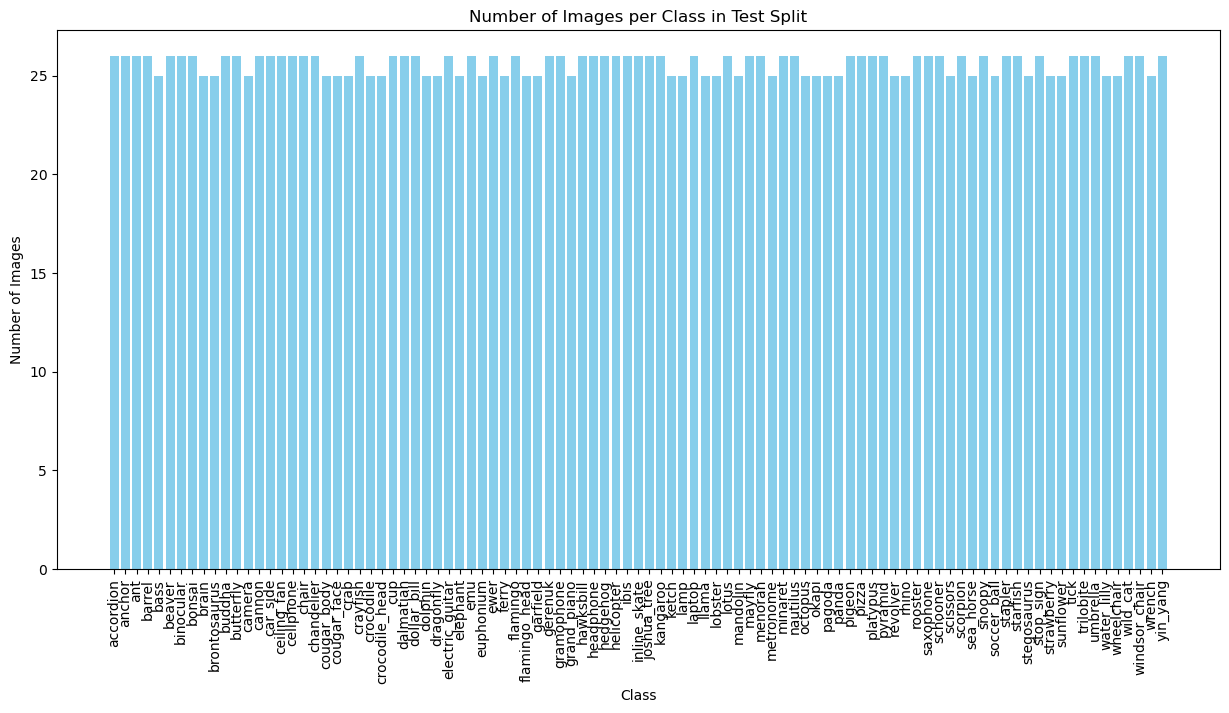

In [9]:
# show number of images per class in the test split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names_with_excluded, np.bincount(y_test), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Test Split')
plt.show()

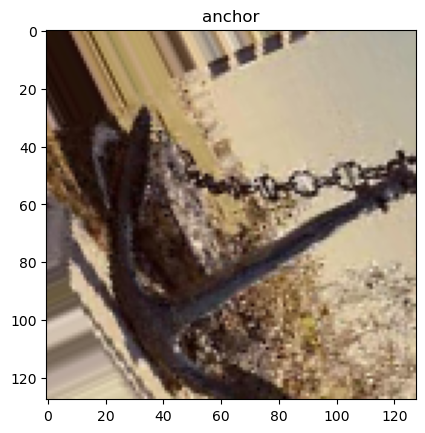

In [10]:
# shows a random augmented image
index = random.randint(0, len(x_train))
plt.imshow(x_train[index].astype(np.float32))
plt.title(class_names_with_excluded[y_train[index]])
plt.show()